<a href="https://colab.research.google.com/github/whyonce/testgit/blob/main/eight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("🌫🛸")

🌫🛸


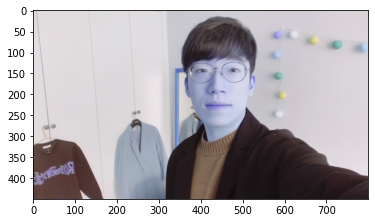

In [ ]:
my_image_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

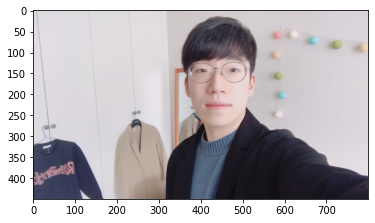

In [ ]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [2]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()
print("🌫🛸")

🌫🛸


In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
dlib_rects

rectangles[[(345, 98) (531, 284)]]

rectangles[[(345, 98) (531, 284)]]


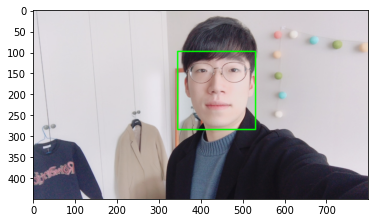

In [ ]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [10]:
model_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [ ]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


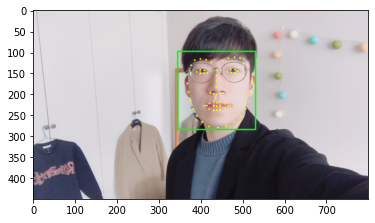

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
print(list_landmarks)

[[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]


In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(437, 182)
(x,y) : (437,89)
(w,h) : (187,187)


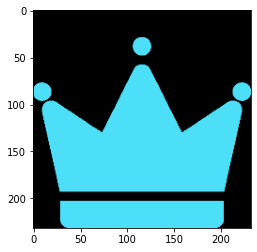

(232, 232, 3)


In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/king.png'
img_sticker1 = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker1 = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker1)
plt.show()
print (img_sticker1.shape)

In [ ]:
img_sticker1

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (344,-98)


In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (344,0)


In [ ]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


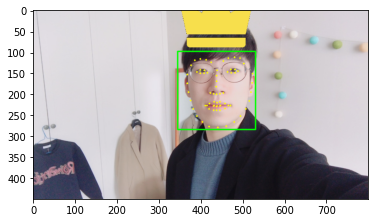

In [ ]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

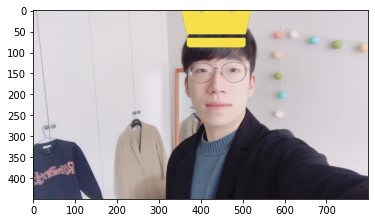

In [ ]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# 자 이제 다른 사진으로 고양이 수염을 씌우겠습니다.

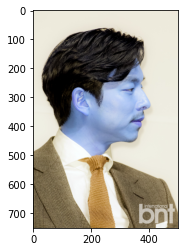

In [ ]:
image_path1 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/side_face1.jpg'
img_bgr1 = cv2.imread(image_path1)    # OpenCV로 이미지를 불러옵니다
img_show1 = img_bgr1.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_show1)
plt.show()

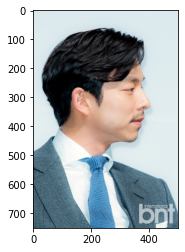

In [ ]:
img = cv2.cvtColor(img_bgr1, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

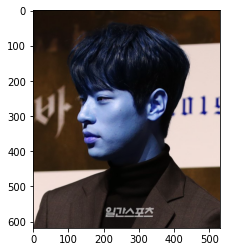

In [ ]:
image_path2 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/side_face2.jpg'
img_bgr2 = cv2.imread(image_path2) 
plt.imshow(img_bgr2)
plt.show()

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_bgr2, 1)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   



rectangles[[(22, 142) (290, 409)]]


In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_bgr1, 2)   # (image, num of image pyramid)

# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   



rectangles[[(224, 199) (455, 430)]]


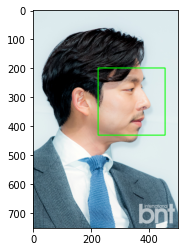

In [ ]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show1, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [ ]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


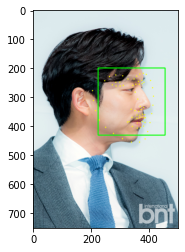

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show1, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 30

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] + dlib_rect.height() //2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(369, 331)
(x,y) : (369,447)
(w,h) : (232,232)


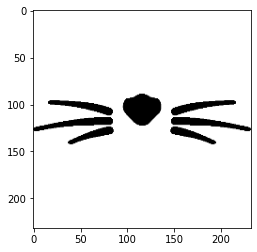

(232, 232, 3)


In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
plt.show()
print (img_sticker.shape)

In [ ]:
img_sticker

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
temp = img_sticker.copy()

In [ ]:
temp = np.where(temp == 255, 0, 255)

In [ ]:
temp

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]])

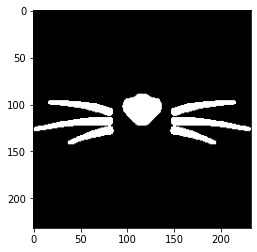

In [ ]:
plt.imshow(temp)
plt.show()

In [ ]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (253,215)


In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (253,215)


In [ ]:
img_show1 = img_bgr1.copy()

In [ ]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255 ,sticker_area,img_sticker).astype(np.uint8)


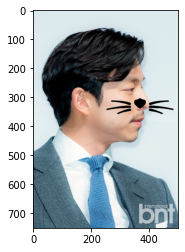

In [ ]:
plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

# 수염 위치는 얼추 맞으나 각도가 맞지 않는다.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


rows, cols = img_sticker.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[100, 50], [200, 50], [100, 200]])
pts2 = np.float32([[80, 70], [210, 60], [250, 120]])

# ---② 변환 전 좌표를 이미지에 표시
cv2.circle(img_sticker, (100,50), 5, (255,0), -1)
cv2.circle(img_sticker, (200,50), 5, (0,255,0), -1)
cv2.circle(img_sticker, (100,200), 5, (0,0,255), -1)

print()

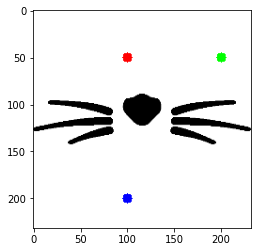

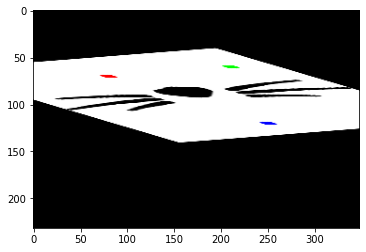

In [ ]:
#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(img_sticker, mtrx, (int(cols * 1.5), (int(rows * 1))))

#---⑤ 결과 출력
plt.imshow(img_sticker)
plt.show()
plt.imshow(dst)
plt.show()

In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[75, 125], [175, 125], [116, 116]])
pts2 = np.float32([[75, 125], [175, 20], [116, 116]])

# ---② 변환 전 좌표를 이미지에 표시
cv2.circle(img_sticker, (75,125), 5, (255,0), -1)
cv2.circle(img_sticker, (175,125), 5, (0,255,0), -1)
cv2.circle(img_sticker, (116,116), 5, (0,0,255), -1)

print()

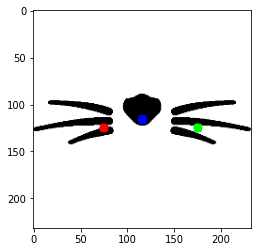

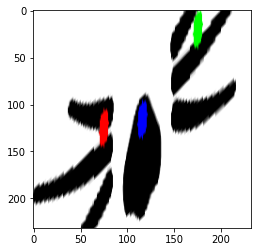

In [ ]:
#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(img_sticker, mtrx, (int(cols * 1), (int(rows * 1))))

#---⑤ 결과 출력
plt.imshow(img_sticker)
plt.show()
plt.imshow(dst)
plt.show()

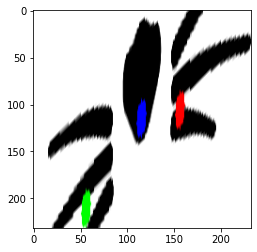

In [ ]:
img90 = cv2.rotate(dst, cv2.ROTATE_180)
plt.imshow(img90)
plt.show()

In [ ]:
img_show1 = img_bgr1.copy()

In [ ]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img90==255 ,sticker_area,img90).astype(np.uint8)


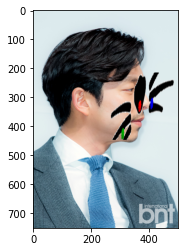

In [ ]:
plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

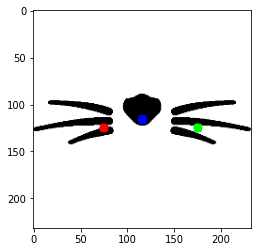

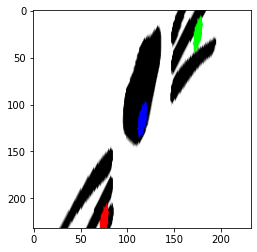

In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))

rows, cols = img_sticker.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[75, 125], [175, 125], [116, 116]])
pts2 = np.float32([[75, 225], [175, 25], [116, 116]])

# ---② 변환 전 좌표를 이미지에 표시
cv2.circle(img_sticker, (75,125), 5, (255,0), -1)
cv2.circle(img_sticker, (175,125), 5, (0,255,0), -1)
cv2.circle(img_sticker, (116,116), 5, (0,0,255), -1)

print()

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(img_sticker, mtrx, (int(cols * 1), (int(rows * 1))))

#---⑤ 결과 출력
plt.imshow(img_sticker)
plt.show()
plt.imshow(dst)
plt.show()

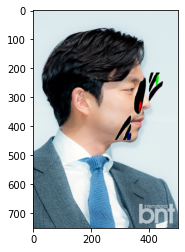

In [ ]:
img_show1 = img_bgr1.copy()

# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(dst==255 ,sticker_area,dst).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

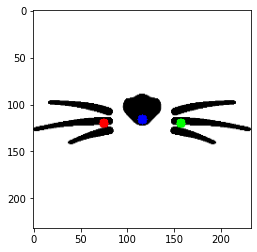

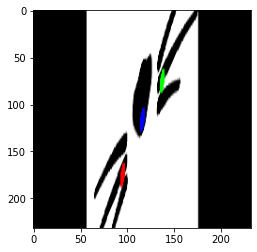

In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))

rows, cols = img_sticker.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[75, 120], [157, 120], [116, 116]])
pts2 = np.float32([[95, 175], [137, 75], [116, 116]])

# ---② 변환 전 좌표를 이미지에 표시
cv2.circle(img_sticker, (75,120), 5, (255,0), -1)
cv2.circle(img_sticker, (157,120), 5, (0,255,0), -1)
cv2.circle(img_sticker, (116,116), 5, (0,0,255), -1)

print()

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(img_sticker, mtrx, (int(cols * 1), (int(rows * 1))))

#---⑤ 결과 출력
plt.imshow(img_sticker)
plt.show()
plt.imshow(dst)
plt.show()

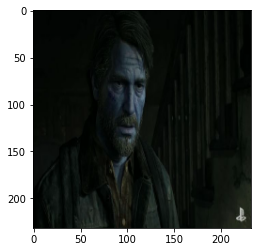

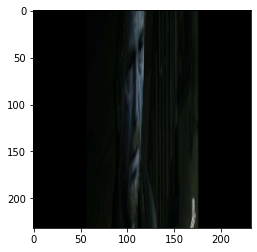

In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/last_of.jpg'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))

rows, cols = img_sticker.shape[:2]

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[75, 120], [157, 120], [116, 116]])
pts2 = np.float32([[95, 175], [137, 75], [116, 116]])


print()

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(img_sticker, mtrx, (int(cols * 1), (int(rows * 1))))

#---⑤ 결과 출력
plt.imshow(img_sticker)
plt.show()
plt.imshow(dst)
plt.show()

In [ ]:
rows, cols = img_sticker.shape[:2]
print(mtrx)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

# 멍...

In [ ]:
temp_dst = dst.copy()

In [ ]:
temp_dst.shape

(232, 232, 3)

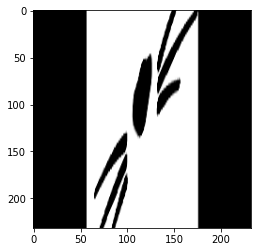

In [ ]:
plt.imshow(temp_dst)
plt.show()

In [ ]:
(temp_dst)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [ ]:
t = np.where(((temp_dst == 255) & (temp_dst[0] <= 40)), 0, temp_dst)

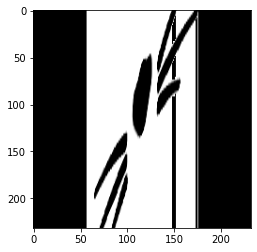

In [ ]:
plt.imshow(t)
plt.show()

(232, 57, 3)


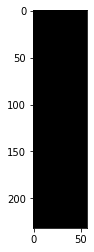

In [ ]:
s1 = temp_dst[:, :57]
print(s1.shape)

plt.imshow(s1)
plt.show()

(232, 58, 3)


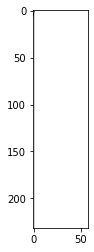

In [ ]:
s2 = temp_dst[:, 174:]
print(s2.shape)

plt.imshow(s2)
plt.show()

In [ ]:
s1 = np.where(s1 == 0, 255, s1)

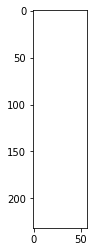

In [ ]:
plt.imshow(s1)
plt.show()

In [ ]:
s2 = np.where(s2 == 0, 255, s2)

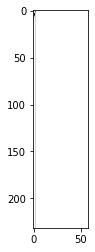

In [ ]:
plt.imshow(s2)
plt.show()

In [ ]:
temp_dst[:, :57] = s1
temp_dst[:, 174:] = s2

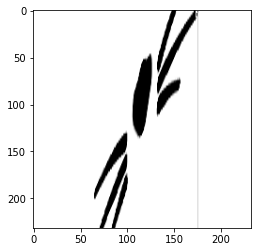

In [ ]:
plt.imshow(temp_dst)
plt.show()

In [ ]:
row, col, c = temp_dst.shape

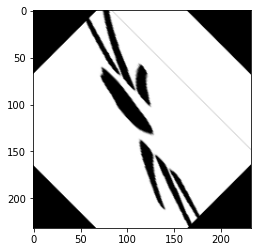

In [ ]:

test_ro1 = cv2.getRotationMatrix2D((int(row/2), int(col/2)), 45, 1)
temp_dst2 = cv2.warpAffine(temp_dst, test_ro1, (row, col))

plt.imshow(temp_dst2)
plt.show()

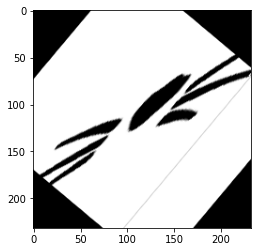

In [ ]:

test_ro1 = cv2.getRotationMatrix2D((int(row/2), int(col/2)), -40, 1)
temp_dst2 = cv2.warpAffine(temp_dst, test_ro1, (row, col))

plt.imshow(temp_dst2)
plt.show()

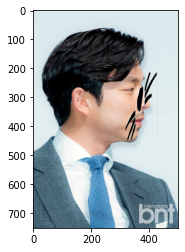

In [ ]:
img_show1 = img_bgr1.copy()

# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(temp_dst==255 ,sticker_area,temp_dst).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

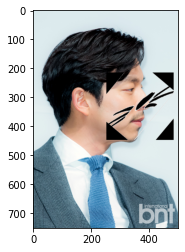

In [ ]:
img_show1 = img_bgr1.copy()

# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(temp_dst2==255 ,sticker_area,temp_dst2).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

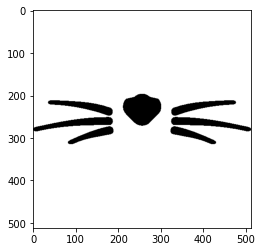

(512, 512, 3)


In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
#img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
plt.show()
print (img_sticker.shape)

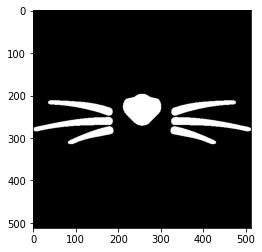

In [ ]:
plt.imshow(temp)
plt.show()

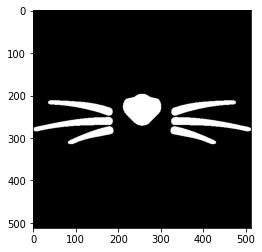

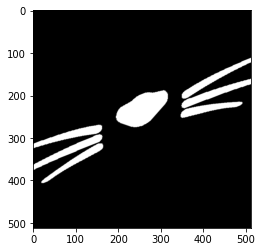

In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다

temp = img_sticker.copy()
temp = np.where(temp == 255, 0, 255)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/cat_blakc.png', temp)

temp_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/cat_blakc.png'
temp_stc = cv2.imread(temp_path)

rows, cols, c = temp.shape

# ---① 변환 전, 후 각 3개의 좌표 생성
pts1 = np.float32([[200, 250], [312, 250], [256, 256]])
pts2 = np.float32([[180, 280], [332, 220], [256, 256]])

#---③ 짝지은 3개의 좌표로 변환 행렬 계산
mtrx = cv2.getAffineTransform(pts1, pts2)
#---④ 어핀 변환 적용
dst = cv2.warpAffine(temp_stc, mtrx, (int(cols * 1), (int(rows * 1))))

#---⑤ 결과 출력
plt.imshow(temp_stc)
plt.show()
plt.imshow(dst)
plt.show()

(512, 512, 3)

# 이미지 크기를 줄여볼까?

In [ ]:
img_small = cv2.resize(img90, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)

In [ ]:
img_show1 = img_bgr1.copy()
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_small==255 ,sticker_area,img_small).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

ValueError: ignored

# shape 크기가 바뀌네...

# 아핀 변환을 사용하면 이미지가 돌아가기는 하나

# 크기가 바뀌게 된다....

# 푸리에 변환

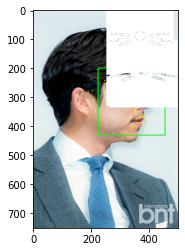

In [ ]:
plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

# 어 일단 수염의 각도도 문제지만 먼저 위치가 맞지 않는다.
# 위치 조정 가즈아~~

# 35

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[35][0]
    y = landmark[35][1]
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(369, 331)
(x,y) : (381,335)
(w,h) : (232,232)


In [ ]:
sticker_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(232, 232, 3)


In [ ]:
refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (265,103)


In [ ]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show1[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)


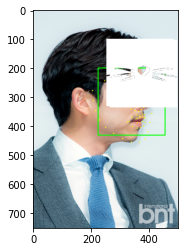

In [ ]:
plt.imshow(cv2.cvtColor(img_show1, cv2.COLOR_BGR2RGB))
plt.show()

# 실험 해 볼거

# 과연 사람 사진외에 사진은 랜드마크 인식이 될까?

In [21]:
lastof_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/last_of.jpg'

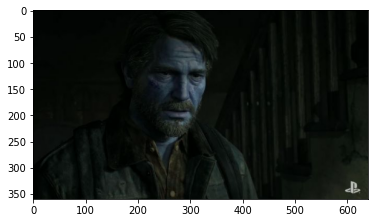

In [22]:
img_bgr = cv2.imread(lastof_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

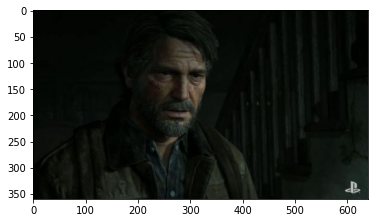

In [23]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [24]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
dlib_rects

rectangles[[(201, 81) (356, 236)]]

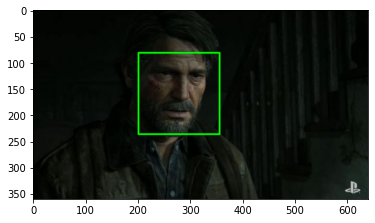

In [25]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [26]:
model_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [29]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


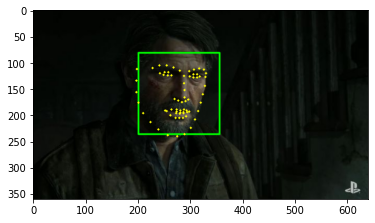

In [30]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 확인

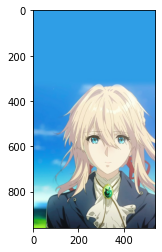

In [31]:
violet_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/violet.jpg'
img_bgr2 = cv2.imread(violet_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [32]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(216, 514) (439, 737)]]

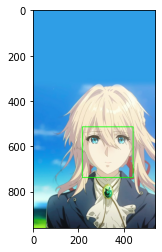

In [33]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [34]:
list_landmarks = []
for dlib_rect in dlib_rects2:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


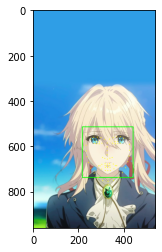

In [35]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr2, point, 2, (0, 255, 255), -1)

img_show_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [36]:
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/violet1.jpg', img_show_rgb2)

True

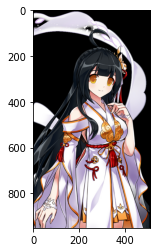

In [37]:
ara_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/ara.png'
img_bgr2 = cv2.imread(ara_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [39]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 2)   # (image, num of image pyramid)
dlib_rects2

rectangles[]

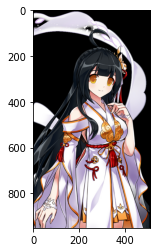

In [40]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [41]:
list_landmarks = []
for dlib_rect in dlib_rects2:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

IndexError: ignored

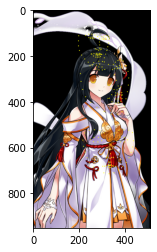

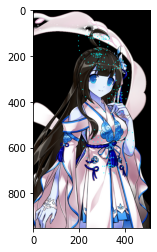

In [ ]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr2, point, 2, (0, 255, 255), -1)

img_show_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()
plt.imshow(img_bgr2)
plt.show()

In [ ]:
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/ara1.png', img_bgr2)

True

# 랜드마크와 유사한 얼굴을 가지면 가질 수록 랜드마크 범위내로 얼굴이 잘 나왔다.

# 그러나 다른 얼굴 이외의 부분이 얼굴로 인식되는 경우가 있었다. =>
# 이러한 현상이 발생한 이유는 필자가 랜드마크 리스트 값을 초기화를 안해서 생긴 실수이다. 초기화를 하고 보니 이러한 현상이 사라졌다.

# 오류를 발결한 이유 : 처음 코드를 쓸때 위에서 랜드마크 리스트를 정의한 상태로 돌리다가 나중에 다시 할때 정의를 하지 않고 코드를 실행 시키다가 오류가 발생했는데 그때 초기화 한다는 것을 깜빡하고 돌렸다는 점을 파악했다. 

# 허나 초기화를 시키고 얼굴을 인식할때 얼굴이 사람얼굴과 비슷하면 인식을 했으나 눈, 코, 입 모양이 다를 경우에는 인식이 잘 되지 않았다.

# 이 경우가 사람사진이 아닌 부분만 이러는 것인지 아니면 사람 사진인 경우에도 나오는지 궁금해 여러 경우의 사람사진으로 확인을 하기로 했다. => 이 경우에는 사람의 얼굴이 작게 나올때, 얼굴 각도, 화질등을 검사하기로 했다. 

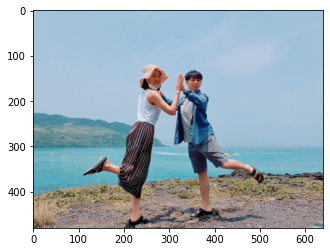

In [5]:
sky_path1 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/sky.jpg'
img_bgr2 = cv2.imread(sky_path1)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [6]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(341, 142) (377, 178)]]

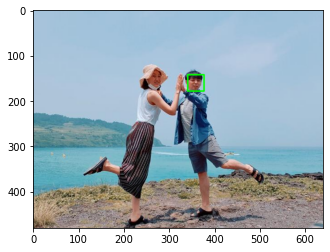

In [7]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [12]:
list_landmarks = []

for dlib_rect in dlib_rects2:
    points = landmark_predictor(img_rgb2, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


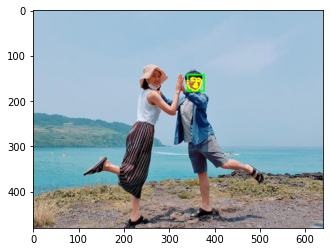

In [13]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr2, point, 2, (0, 255, 255), -1)

img_show_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

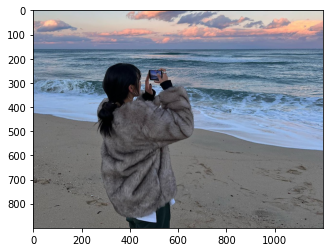

In [15]:
sky_path3 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/sky3.jpg'
img_bgr2 = cv2.imread(sky_path3)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [18]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 3)   # (image, num of image pyramid)
dlib_rects2

rectangles[]

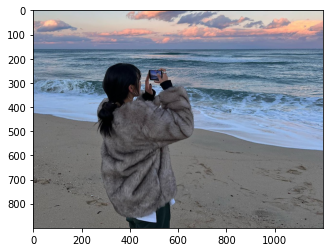

In [19]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [20]:
list_landmarks = []

for dlib_rect in dlib_rects2:
    points = landmark_predictor(img_rgb2, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

IndexError: ignored

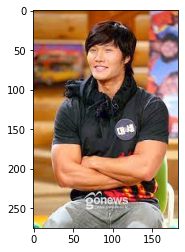

In [43]:
kim_path1 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/kimjong1.jfif'
img_bgr2 = cv2.imread(kim_path1)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [44]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(64, 41) (108, 84)]]

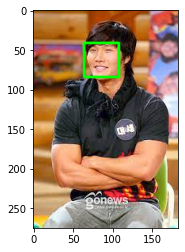

In [45]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [46]:
list_landmarks = []

for dlib_rect in dlib_rects2:
    points = landmark_predictor(img_rgb2, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


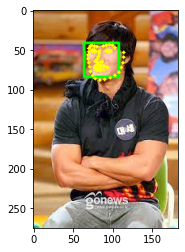

In [47]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr2, point, 2, (0, 255, 255), -1)

img_show_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

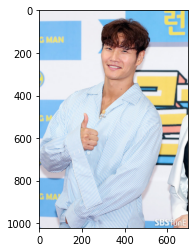

In [52]:
kim_path2 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/kimjong2.jpg'
img_bgr2 = cv2.imread(kim_path2)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [53]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(287, 150) (442, 305)]]

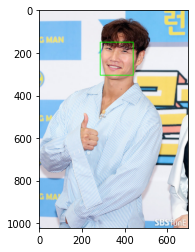

In [54]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

In [55]:
list_landmarks = []

for dlib_rect in dlib_rects2:
    points = landmark_predictor(img_rgb2, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


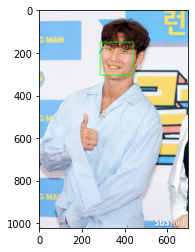

In [56]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr2, point, 2, (0, 255, 255), -1)

img_show_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

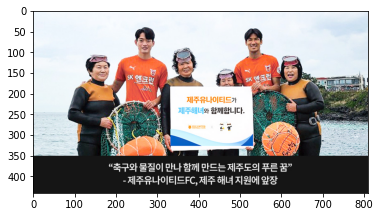

In [57]:
sky_path2 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/sky2.jpg'
img_bgr2 = cv2.imread(sky_path2)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [58]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(513, 58) (549, 94)], [(247, 60) (290, 103)], [(149, 126) (185, 162)], [(602, 127) (645, 170)], [(349, 118) (385, 154)]]

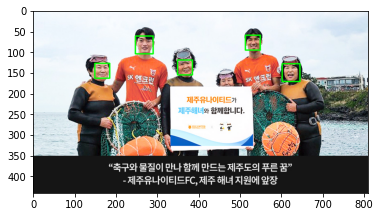

In [61]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

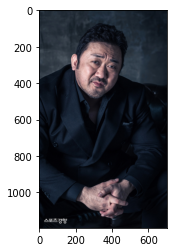

In [63]:
ma_path1 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/ma1.jpg'
img_bgr2 = cv2.imread(ma_path1)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [64]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(200, 201) (468, 468)]]

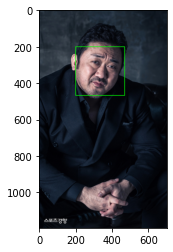

In [65]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

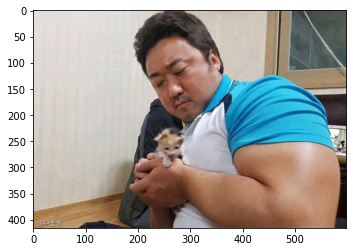

In [66]:
ma_path2 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/ma2.jpg'
img_bgr2 = cv2.imread(ma_path2)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [67]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(210, 82) (339, 211)]]

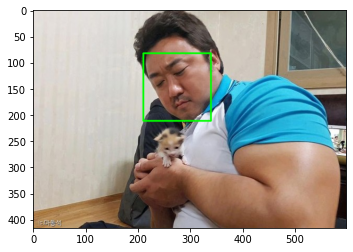

In [68]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

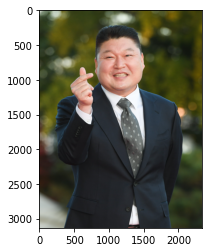

In [69]:
gang_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/gang.jpg'
img_bgr2 = cv2.imread(gang_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [70]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(798, 428) (1463, 1094)]]

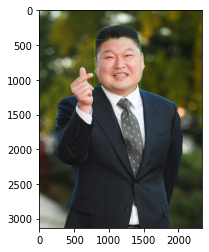

In [71]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

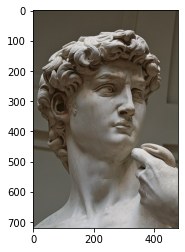

In [72]:
dabi_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/dabi.jfif'
img_bgr2 = cv2.imread(dabi_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [73]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(171, 171) (438, 439)]]

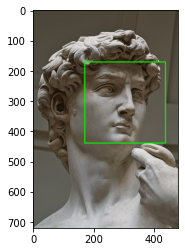

In [74]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

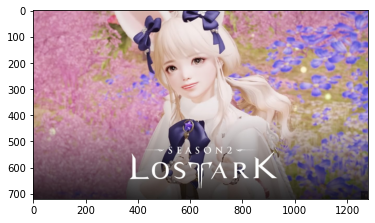

In [78]:
doaga_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/doaga.jpg'
img_bgr2 = cv2.imread(doaga_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [79]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(489, 142) (712, 365)]]

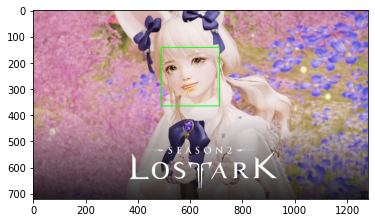

In [82]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

68


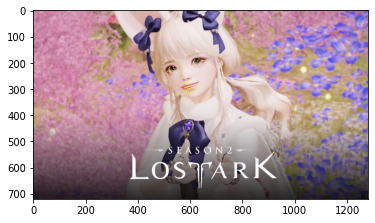

In [81]:
list_landmarks = []

for dlib_rect in dlib_rects2:
    points = landmark_predictor(img_rgb2, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_bgr2, point, 2, (0, 255, 255), -1)

img_show_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

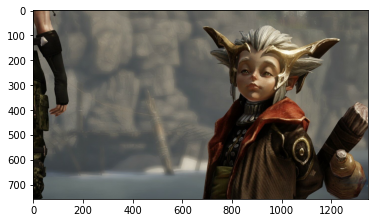

In [83]:
sandi_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/sandi.jpg'
img_bgr2 = cv2.imread(sandi_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [84]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(799, 201) (985, 387)]]

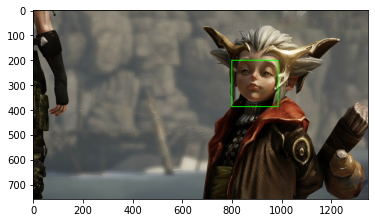

In [85]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

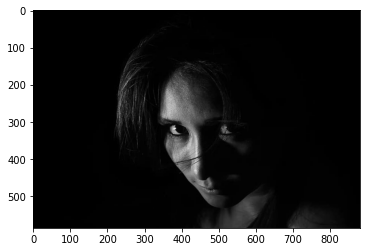

In [87]:
dark1_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/dark1.jpg'
img_bgr2 = cv2.imread(dark1_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [89]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 2)   # (image, num of image pyramid)
dlib_rects2

rectangles[]

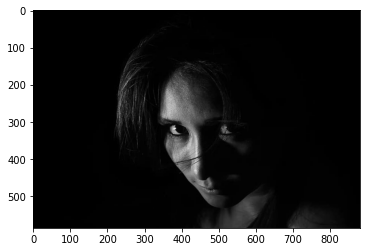

In [90]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

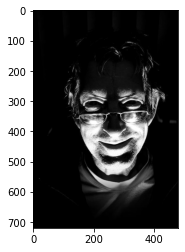

In [91]:
dark2_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/dark2.jpg'
img_bgr2 = cv2.imread(dark2_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [92]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(98, 241) (419, 562)]]

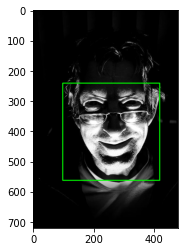

In [93]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

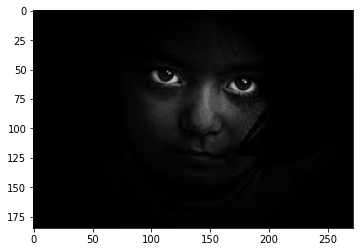

In [95]:
dark3_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/dark3.jfif'
img_bgr2 = cv2.imread(dark3_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [96]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(81, 24) (210, 153)]]

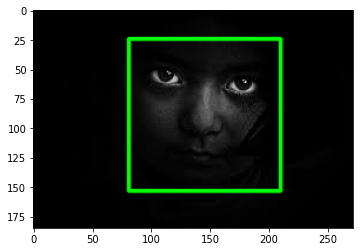

In [97]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

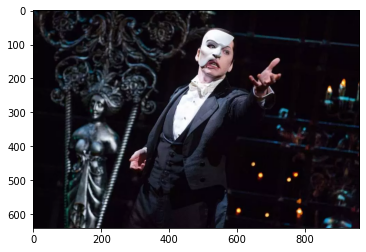

In [98]:
gamen_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/gamen.webp'
img_bgr2 = cv2.imread(gamen_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [99]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 1)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(485, 80) (593, 187)]]

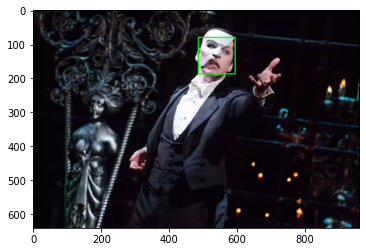

In [100]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

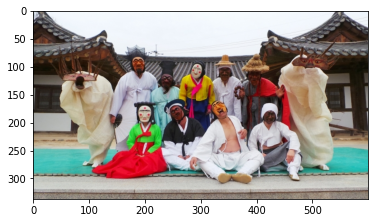

In [111]:
gamen_path2 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/gamen2.jpg'
img_bgr2 = cv2.imread(gamen_path2)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [113]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 4)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(278, 96) (302, 119)], [(186, 174) (214, 202)], [(175, 83) (198, 106)], [(245, 171) (268, 194)], [(49, 86) (55, 93)], [(227, 114) (250, 137)]]

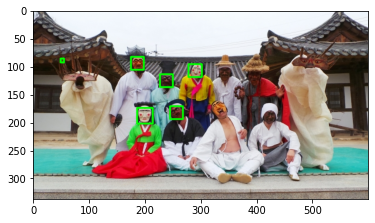

In [114]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

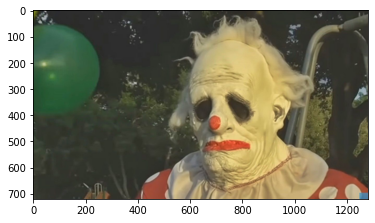

In [107]:
gande_path = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/gande.jpg'
img_bgr2 = cv2.imread(gande_path)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [109]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 2)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(522, 212) (921, 611)]]

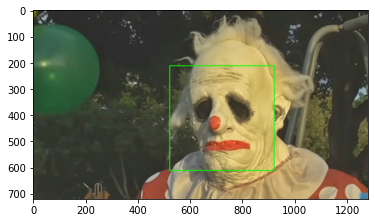

In [110]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

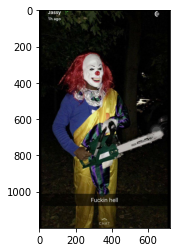

In [115]:
gande_path2 = '/content/drive/MyDrive/Colab Notebooks/camera_sticker/images/gande2.jpg'
img_bgr2 = cv2.imread(gande_path2)
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb2)
plt.show()

In [116]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb2 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
dlib_rects2 = detector_hog(img_rgb2, 2)   # (image, num of image pyramid)
dlib_rects2

rectangles[[(248, 278) (381, 412)]]

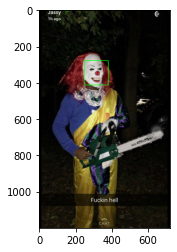

In [117]:
for dlib_rect in dlib_rects2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_bgr2, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb2 =  cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb2)
plt.show()

# 결론 : 얼굴 검출 기준은 눈,코,입 얼굴형태이고 실제 사람이 아닌 애니메이션도 사람 얼굴과 구조가 비슷하면 인식을 했다.

# 허나 눈, 코, 입 구조가 다르거나 안 보일 경우, 거리 때문에 화질이 좋지 않아 눈, 코, 입이 잘 안보이거나, 얼굴이 정면이 아닌 옆모습이나, 얼굴이 나오지 않는 경우, 명암으로 얼굴 모양이 나오지 않는 경우, 가면을 쓰고 있는 경우등에서는 인식이 안되는 경우도 있었다.

# 옆모습의 경우 이모티콘 위치는 위치 값 기준으로 계산하면 알맞은 위치에 이모티콘이 생기지만, 얼굴을 옆으로 돌린 각도에 따라 이모티콘을 돌리는 것은 어려웠다.